---
author: "Dragos Ailoae"
title: "Seemingly Unrelated Regression (SUR)"
subtitle: "Some Examples"
---





## Intro: The Grunfeld dataset






To illustrate the basics of SUR analysis with R we will use a subset of the Grunfeld dataset. This is the data made famous by Arnold Zellner with his classic 1962 paper on seemingly unrelated regressions. Grunfeld originally used the dataset in his 1958 PhD thesis _The determinants of corporate investment._ at the  University of Chicago.

Our subset includes just two firms, US (US Steel) and DM (Diamond Match) observed over the period 1935 to 1954. The problem is to find the determinants of investment by a firm, $i n v_{i t}$ among regressors such as the value of the firm, $v_{i t}$, and capital stock $k_{i t}$.


The Grunfeld Investment model is as follows:
$$
inv_{i t}=\beta_{0 i}+\beta_{1 i} v_{i t}+\beta_{2 i} k_{i t}+\epsilon_{i t}
$$
    
where 
    
$\begin{aligned} 
{inv}_{{i t}}&= \text {gross investment for firm } {i} \text { at time } {t} \\
{v}_{{i t}}&=\text { market value of firm } {i} \text { at } {t} \\ 
{k}_{{i t}} &=\text { capital stock of firm } {i} \text { at } {t} . 
\end{aligned}$

If you'd like to play with the full dataset you can access it [here](http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF10-4.csv) or [here](https://www.zeileis.org/grunfeld/Grunfeld.csv). Some additional info on this dataset [here](https://www.zeileis.org/grunfeld/)

## Loading the data

Let's begin by loading some necessary packages...

In [1]:
rm(list=ls())    # Removes all items in Environment!
options(repr.plot.width = 6, repr.plot.height = 6,repr.plot.res = 150, warn=-1)

# LOAD PACKAGES:
packages <- c("plm","systemfit","modelsummary")
# Loop though vector and load respective packages:
zzz <- lapply(packages, function(xxx) suppressMessages(require(xxx, 
               character.only = TRUE, quietly=TRUE, warn.conflicts = FALSE)))  # quiet no warnings
#zzz <- lapply(packages, require, character.only = TRUE) # verbose with warnings

...and the dataset:

In [2]:
my.raw.data <- read.csv(url("https://wwwedu.github.io/NYU_S25/Lecture02/grun_data.csv"))
my.raw.data

firm,year,inv,val,cap
<chr>,<int>,<dbl>,<dbl>,<dbl>
US,1935,209.90,1362.40,53.80
US,1936,355.30,1807.10,50.50
US,1937,469.90,2676.30,118.10
US,1938,262.30,1801.90,260.20
US,1939,230.40,1957.30,312.70
US,1940,361.60,2202.90,254.20
US,1941,472.80,2380.50,261.40
US,1942,445.60,2168.60,298.70
US,1943,361.60,1985.10,301.80


## Equation by equation estimation using the _lm()_ function

As a first step, we may want to fit the data for each firm using our old friend the lm() function. So let's break up the dataset into two separate subsets, one for Diamond Match and another for US Steel.

In [3]:
US.data <- subset(my.raw.data,firm=="US")
head(US.data)
DM.data <- subset(my.raw.data,firm=="DM")
head(DM.data)

,firm,year,inv,val,cap
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,US,1935,209.9,1362.4,53.8
2,US,1936,355.3,1807.1,50.5
3,US,1937,469.9,2676.3,118.1
4,US,1938,262.3,1801.9,260.2
5,US,1939,230.4,1957.3,312.7
6,US,1940,361.6,2202.9,254.2


,firm,year,inv,val,cap
,<chr>,<int>,<dbl>,<dbl>,<dbl>
21,DM,1935,2.54,70.91,4.50
22,DM,1936,2.00,87.94,4.71
23,DM,1937,2.19,82.20,4.57
24,DM,1938,1.99,58.72,4.56
25,DM,1939,2.03,80.54,4.38
26,DM,1940,1.81,86.47,4.21


We can now fit the US Steel data using lm():

In [4]:
lm.US <- lm(inv ~ val + cap, US.data)
summary(lm.US)


Call:
lm(formula = inv ~ val + cap, data = US.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-184.488  -77.210    4.508   59.421  144.035 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -49.1983   148.0754  -0.332   0.7438  
val           0.1749     0.0742   2.357   0.0307 *
cap           0.3896     0.1424   2.737   0.0140 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.43 on 17 degrees of freedom
Multiple R-squared:  0.4709,	Adjusted R-squared:  0.4086 
F-statistic: 7.564 on 2 and 17 DF,  p-value: 0.00447


And similarly for Diamond Match:

In [5]:
lm.DM <- lm(inv ~ val + cap, DM.data)
summary(lm.DM)


Call:
lm(formula = inv ~ val + cap, data = DM.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5748 -0.5972 -0.3036  0.3834  2.8344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.161519   2.065564   0.078    0.939    
val         0.004573   0.027161   0.168    0.868    
cap         0.437369   0.079589   5.495 3.94e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.085 on 17 degrees of freedom
Multiple R-squared:  0.6432,	Adjusted R-squared:  0.6012 
F-statistic: 15.32 on 2 and 17 DF,  p-value: 0.0001571


## SUR motivation: contemporaneously correlated disturbances

We may suspect that idiosyncratic macroeconomic shocks may have affected both firms.  Consequently, there may be contemporaneous correlations in our disturbances that can be exploited to improve the efficiency of our OLS estimators.

Assuming the OLS estimation is unbiased, the residuals may be a good indicator of the economic disturbances so we may want to inspect visually if the two sets of residuals show similar patterns:

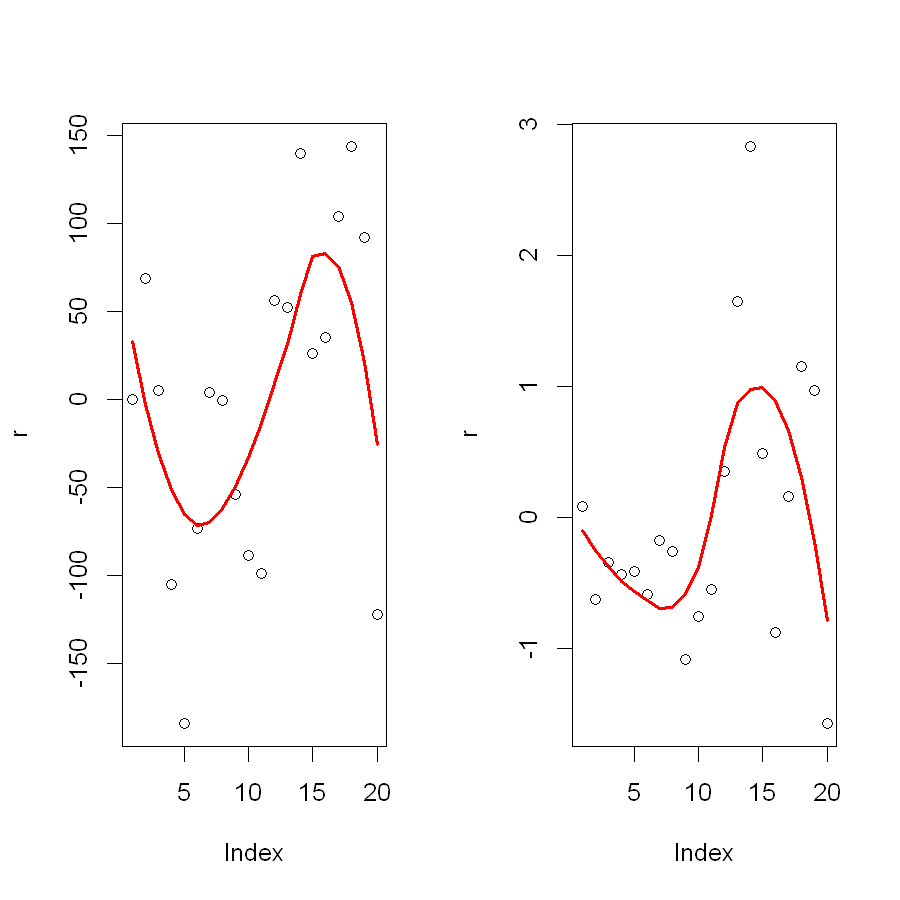

In [6]:
par(mfrow = c(1, 2))

r <- lm.US$res
n<- 1:length(r)
plot(r)
# add local polinomial trend
lines(predict(loess(r~n)), col='red', lwd=2)

r <- lm.DM$res
n<- 1:length(r)
plot(r)
# add local polinomial trend
lines(predict(loess(r~n)), col='red', lwd=2)

The trend of the residuals appear correlated so we may consider the use of a panel data model to improve the efficiency of our estimators.

## R packages for panel data analysis: PLM and SYSTEMFIT
### Configuring data as a panel

Two R packages frequently used for panel data analysis are PLM and SYSTEMFIT.  To use the functions in these packages we must first configure our data as a panel object by specifying the columns containing the i and t indexing:

In [7]:
my.data <- pdata.frame(my.raw.data, c("firm", "year"))  #configure the data as a panel
head(my.data)

,firm,year,inv,val,cap
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
DM-1935,DM,1935,2.54,70.91,4.50
DM-1936,DM,1936,2.00,87.94,4.71
DM-1937,DM,1937,2.19,82.20,4.57
DM-1938,DM,1938,1.99,58.72,4.56
DM-1939,DM,1939,2.03,80.54,4.38
DM-1940,DM,1940,1.81,86.47,4.21


## Alternatives to _lm()_ for equation by equation estimation

Functions in these packages allow us to do equation by equation OLS estimation directly without having to split our data. For example, the pvcm() function in the PLM package calculates the variable coefficients for each equation:

In [8]:
myOLS.pvcm <- pvcm(inv ~ val + cap, data = my.data, model = "within")
myOLS.pvcm


Model Formula: inv ~ val + cap
<environment: 0x0000017d0212f930>

Coefficients:
   (Intercept)       val     cap
DM     0.16152 0.0045734 0.43737
US   -49.19832 0.1748560 0.38964


Or systemfit() in the SYSTEMFIT package:

In [9]:
myOLS.sysfit <- systemfit(inv ~ val + cap, method = "OLS", data = my.data)
# summary(myOLS.sysfit)$coeff
get_estimates(myOLS.sysfit)

term,estimate,std.error,conf.level,conf.low,conf.high,statistic,df.error,p.value,component,s.value,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
(Intercept),0.161518567,2.06556414,0.95,-4.19644084,4.51947797,0.07819586,17,9.385853e-01,DM,0.1,
val,0.004573432,0.02716079,0.95,-0.05273082,0.06187768,0.16838365,17,8.682686e-01,DM,0.2,
cap,0.437369190,0.07958891,0.95,0.26945128,0.60528710,5.49535372,17,3.940826e-05,DM,14.6,
(Intercept),-49.198321862,148.07536507,0.95,-361.61003378,263.21339006,-0.33225190,17,7.437606e-01,US,0.4,
val,0.174856015,0.07419805,0.95,0.01831182,0.33140021,2.35661209,17,3.069905e-02,US,5.0,
cap,0.389641889,0.14236688,0.95,0.08927403,0.69000974,2.73688583,17,1.404874e-02,US,6.2,


We could also compute the coefficients manually.  This also highlights the data matrix arrangement in the SUR model:

In [10]:
X1 <- cbind(1, US.data$val, US.data$cap,0,0,0)  #top half of the matrix
X2 <- cbind(0,0,0,1, DM.data$val, DM.data$cap)  #bottom half

X <- rbind(X1,X2)                               #bind the two halfs
y <- my.raw.data$inv                            #y vector

betas.ols <- solve(t(X) %*% X) %*% t(X) %*% y
betas.ols

-49.198321862
0.174856015
0.389641889
0.161518567
0.004573432
0.437369190


## Checking residuals covariance matrix

The systemfit() output object allows us to quickly look at the contemporaneous covariance and correlation matrices:

In [11]:
summary(myOLS.sysfit)$residCov

,DM,US
DM,1.178043,73.45838
US,73.458384,9299.60405


In [12]:
summary(myOLS.sysfit)$residCor

,DM,US
DM,1.0000000,0.7018245
US,0.7018245,1.0000000


For some practice with Kronecker products in R, we may want to compute the estimated variance covariance matrix $\hat{\Omega}$

In [26]:
N <- length(DM.data$inv)
sigma_hat <- summary(myOLS.sysfit)$residCov
omega_hat <- sigma_hat %x% diag(N)

# Quarto/knitr HTML render -> make an HTML table (scrollable)
# Interactive notebook / console -> print normally
if (requireNamespace("knitr", quietly = TRUE) && knitr::is_html_output()) {
  knitr::kable(omega_hat, format = "html")
} else {
  omega_hat
}

1.178043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,1.178043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,1.178043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,1.178043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,1.178043,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,1.178043,0.000000,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.178043,0.000000,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.178043,0.000000,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.178043,0.000000,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.178043,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,73.45838,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Tests for cross-sectional dependence

As suspected from the visual inspection, we note that there is indeed significant contemporaneous association for our residuals. We will confirm this using the standard tests for cross-sectional dependence:

In [14]:
pcdtest(myOLS.pvcm, test = c("lm"))


	Breusch-Pagan LM test for cross-sectional dependence in panels

data:  NULL
chisq = 9.8512, df = 1, p-value = 0.001697
alternative hypothesis: cross-sectional dependence


In [15]:
pcdtest(myOLS.pvcm, test = c("cd"))


	Pesaran CD test for cross-sectional dependence in panels

data:  NULL
z = 3.1387, p-value = 0.001697
alternative hypothesis: cross-sectional dependence


Both tests confirm that we can reject the null hypothesis of "no cross-sectional dependence" so we will go ahead and estimate the model using SUR:

## Estimating the SUR model

In [16]:
mySUR.sysfit <- systemfit(inv ~ val + cap, method = "SUR", data = my.data)
# summary(mySUR.sysfit)$coeff
get_estimates(mySUR.sysfit)

term,estimate,std.error,conf.level,conf.low,conf.high,statistic,df.error,p.value,component,s.value,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
(Intercept),1.453986158,1.55155893,0.95,-1.81951703,4.72748935,0.9371131,17,3.618238e-01,DM,1.5,
val,-0.006542145,0.02103408,0.95,-0.05092018,0.03783589,-0.3110259,17,7.595623e-01,DM,0.4,
cap,0.352518606,0.06886049,0.95,0.20723566,0.49780155,5.1193157,17,8.543506e-05,DM,13.5,
(Intercept),-97.359988436,110.40031946,0.95,-330.28430222,135.56432535,-0.8818814,17,3.901401e-01,US,1.4,
val,0.213114660,0.05541765,0.95,0.09619364,0.33003568,3.8456098,17,1.295969e-03,US,9.6,
cap,0.297129690,0.13053611,0.95,0.02172256,0.57253682,2.2762259,17,3.605550e-02,US,4.8,


The SUR standard errors are slightly tighter indicating small efficiency gains.

## Testing the "homogeneous coefficients" hypothesis

Finally, we may want to consider whether we can pool our data for the two firms and if parameters for the pooled dataset are significantly different from those estimated equation by equation.

In [17]:
my.Pooled.model <- plm(inv ~ val + cap, data = my.data, model = "pooling")
get_estimates(my.Pooled.model)

term,estimate,std.error,conf.level,conf.low,conf.high,statistic,df.error,p.value,s.value,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
(Intercept),-11.1476225,15.01820589,0.95,-41.5773981,19.2821530,-0.7422739,37,4.626078e-01,1.1,
val,0.1567845,0.01773510,0.95,0.1208498,0.1927192,8.8403488,37,1.180776e-10,33.0,
cap,0.3842592,0.09560581,0.95,0.1905434,0.5779750,4.0192035,37,2.755406e-04,11.8,


In [18]:
pooltest(my.Pooled.model, myOLS.pvcm)


	F statistic

data:  inv ~ val + cap
F = 0.047853, df1 = 3, df2 = 34, p-value = 0.9859
alternative hypothesis: unstability


The Chow test for the poolability of the data cannot reject the null hypothesis that the coefficients are homogeneous across equations.